In [16]:
import torch

file_path = '/Users/abiralshakya/Documents/Research/GraphVectorTopological/kspace_topology_graphs/SG_229/kspace_graph.pt'
#file_path = '/Users/abiralshakya/Documents/Research/GraphVectorTopological/kspace_topology_graphs/SG_230/physics_features.pt'
data = torch.load(file_path, weights_only= False)
print(type(data))
print(data) # Inspect the loaded data

<class 'torch_geometric.data.data.Data'>
Data(x=[12, 10], edge_index=[2, 2661], edge_attr=[2661, 1], num_nodes=12, space_group=[1], num_bands=[1])


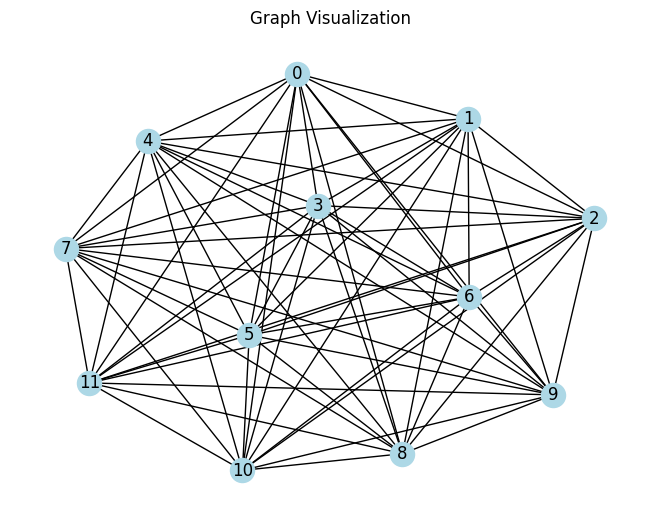

In [17]:
# Assuming 'data' is a torch_geometric.data.Data object
import networkx as nx
import matplotlib.pyplot as plt

data = torch.load(file_path, weights_only= False)

if hasattr(data, 'edge_index'): # Check if it's a graph-like object
    g = nx.Graph()
    for i in range(data.num_nodes):
        g.add_node(i)
    for i, j in data.edge_index.T.tolist():
        g.add_edge(i, j)

    # You might need to extract positions if available (e.g., data.pos)
    if hasattr(data, 'pos') and data.pos is not None:
        pos = {i: data.pos[i].cpu().numpy() for i in range(data.num_nodes)}
        nx.draw(g, pos, with_labels=True, node_color='lightblue')
    else:
        nx.draw(g, with_labels=True, node_color='lightblue')
    plt.title("Graph Visualization")
    plt.show()

In [23]:
# Assuming 'data' is a torch.Tensor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = torch.load('/Users/abiralshakya/Documents/Research/GraphVectorTopological/kspace_topology_graphs/SG_012/physics_features.pt')

if isinstance(data, torch.Tensor):
    data_np = data.cpu().numpy() 

    if data_np.ndim == 1:
        plt.plot(data_np)
        plt.title("1D Feature Tensor")
        plt.show()
    elif data_np.ndim == 2:
        sns.heatmap(data_np)
        plt.title("2D Feature Tensor (Heatmap)")
        plt.show()
    elif data_np.ndim > 2:
        print("High-dimensional tensor. Consider dimensionality reduction or slicing.")
        # Example: Visualize first slice
        sns.heatmap(data_np[0, :, :])

In [29]:
import pickle

file_path = '/Users/abiralshakya/Documents/Research/GraphVectorTopological/multimodal_materials_db_mp/graphs/mp-905/crystal_graph.pkl'
with open(file_path, 'rb') as f:
    data = pickle.load(f)
print(type(data))
print(data) 
#from pymatgen.vis.structure_plotter import StructurePlotter
from pymatgen.vis.plotters import SpectrumPlotter
import matplotlib.pyplot as plt

if hasattr(data, 'is_structure') and data.is_structure: # Check if it's a structure
    plotter = SpectrumPlotter()
    plotter.add_spectra(data)
    plt.show() 
from ase.visualize import view

if hasattr(data, 'get_chemical_symbols'): # Check if it's an Atoms object
    view(data) # Opens a new window with the ASE GUI

<class 'dict'>
{'x': array([[0.57      , 0.5       , 0.16666667],
       [0.57      , 0.5       , 0.16666667],
       [0.57      , 0.5       , 0.16666667],
       [0.57      , 0.5       , 0.16666667],
       [0.57      , 0.5       , 0.16666667],
       [0.57      , 0.5       , 0.16666667],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.5       ],
       [0.09      , 0.25      , 0.

<class 'numpy.ndarray'>
(4756,)
float32
[1. 1. 1. ... 0. 0. 0.]


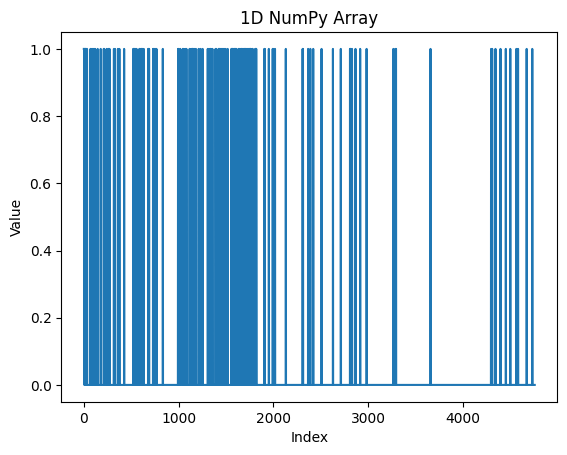

In [44]:
import numpy as np

#file_path = '/Users/abiralshakya/Documents/Research/GraphVectorTopological/multimodal_materials_db_mp/point_clouds/mp-905_asph.npy'
file_path = '/Users/abiralshakya/Documents/Research/GraphVectorTopological/multimodal_materials_db_mp/vectorized_features/mp-905/band_rep_features.npy'
data = np.load(file_path)
print(type(data))
print(data.shape)
print(data.dtype)
print(data) # Inspect the loaded data

# Assuming 'data' is a NumPy array
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if data.ndim == 1:
    plt.plot(data)
    plt.title("1D NumPy Array")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.show()
elif data.ndim == 2:
    sns.heatmap(data)
    plt.title("2D NumPy Array (Heatmap)")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.show()
elif data.ndim == 3:
    print("3D NumPy Array. Visualizing first slice (z=0).")
    sns.heatmap(data[:, :, 0]) # Or data[0, :, :] or data[:, 0, :]
    plt.title("3D NumPy Array - Slice 0")
    plt.show()
    # For more advanced 3D, consider Mayavi or PyVista
    # Example using Mayavi (conceptual):
    # from mayavi import mlab
    # mlab.contour3d(data)
    # mlab.show()
else:
    print(f"NumPy array with {data.ndim} dimensions. Consider dimensionality reduction or specialized tools.")